# Programming Assignment II: Explainability

In this assignment you will train machine learning models and experiment with techniques discussed in the lectures.
This assignment makes use of existing Python libraries for some questions. We have provided links to tutorials/examples if you're not familiar with them yet.

All code that you implement should be in this notebook. You should submit:
* This notebook with your code added. Make sure to add enough documentation. Also provide complete answers to the more theoretical questions in this notebook. These questions are followed by an 'answer indent':
> Answer:

The notebook .ipynb should have the name format `Prog_Explainability_Group_X.ipynb`, where X is your programming group ID.

Important notes:
* Deadline for this assignment is **Monday, June 3, 17:00**.
* Send it to both Mart Koek (m.j.koek@uu.nl) and Heysem Kaya (h.kaya@uu.nl), CCing your programming partner.
* Title of the email: [INFOMHCML] Explainability programming assignment submission X, with X the number of your group.
* There will be a lab session to assist you with the assignment on **Thursday, May 30, between 13:15-15:00 at DALTON 500 - 6.27 and DALTON 500 - 7.27**.

### Installation

For this assignment, we are going to use the following Python packages:
graphviz, matplotlib, pandas, statsmodels, openpyxl, interpret, and scikit-learn.

In [ ]:
# Installing packages
!pip install graphviz
!pip install matplotlib pandas statsmodels openpyxl
!pip install interpret
!pip install scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 59.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.5 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.1-py3-none-any.whl size=4010600 sha256=0d1aaeb757308a76e683dc4d68242f60b316b4feb4e2

### Read the data
We are going to use the ChaLearn LAP-FI (First Impressions) Dataset. This dataset contains 10.000 data points, which correspond to videos collected from YouTube and annotated via Amazon Mechanical Turk for the BIG-5 personality impressions: openness, extraversion, conscientiousness, neuroticism, agreeableness.

These five personality impression scores will be used as features to predict the outcome variable: a job interview invitation.

For a detailed description, see the [paper of the dataset](https://ieeexplore.ieee.org/abstract/document/7966041?casa_token=1Y03H5ykCqsAAAAA:VLhCcjAgByJ2hTdKhulmIUiXIVepEJfFyB7HM0XVts7bN8Gi8wMsiTT0qZ--I_kq8wiUHIpPN7es).


1.   If you use Google Colab, upload 'all_df.csv' (you can find this file on blackboard) through the upload button in the Files tab.
  - Copy the path of the file;
  - Run the cell below with your path. This will ask you for permission to access your Google Drive files and then you can access the data.
2.   If you are running this notebook at your own machine (jupyter notebook), locate the 'all_df.csv' file in the same folder this notebook exists. Then you can run the second cell below.

   



In [ ]:
# Run this cell only if you use Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Make sure you uploaded all_df.csv to your Google Drive and change the path
# to the directory it is located in (usually in content/gdrive/MyDrive/...)
%cd  '/content/gdrive/MyDrive/HCML/Explainability'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/HCML/Explainability


In [ ]:
# Run this cell (both when working locally or with Google Colab)
import pandas as pd

data = pd.read_csv("all_df.csv")
print("Data loaded")

Data loaded


### Loading and preprocessing the data
There are 6000, 2000 and 2000 examples for training, validation/development and test set respectively. In the data this is indicated by the feature `split`.

The training set is used to train models, the validation/development set to optimize the models hyper-parameters, and the test set to evaluate the trained model.

In [ ]:
import numpy as np

# global variables
FEATURE_NAMES = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']
LABEL_NAME = 'interview'

def load_data():
    def split_feature_label(data_set):
        features = data_set[FEATURE_NAMES]
        labels = data_set[LABEL_NAME]
        return features, labels

    train_set = data[data['split'] == 'training']
    val_set = data[data['split'] == 'validation']
    test_set = data[data['split'] == 'test']

    train_features, train_labels = split_feature_label(train_set)
    val_features, val_labels = split_feature_label(val_set)
    test_features, test_labels = split_feature_label(test_set)

    return train_features, train_labels, val_features, \
        val_labels, test_features, test_labels

# Load the data with the function above
(train_features, train_labels, dev_features, \
        dev_labels, test_features, test_labels) = load_data()

# Part 1. Different models

### **1. Linear Regression**

Train a linear regression model (we recommend the `statsmodels.api` package with the ordinary least squares model `sm`).

Hint: to get a linear regression model, you should manually add a constant variable (usually called bias or intercept - that has a fixed value of 1 for all instances) to the data, either by adding it column yourself or by using the `add_constant()` function.



**Q1.1**

Provide the $R^2$ (goodness of fit) statistic and for each feature (+ the bias variable), the following in tabular format:
* Weight estimate (coef)
* SE (standard error of estimates)
* T-statistic

Hint: You can print the summary of the model using `.summary()` to do this. This gives an extensive overview of the performance of a model.

In [ ]:
# We recommend the statsmodels package
import statsmodels.api as sm

# Your code to add a bias/intercept variable
train_features_normalized = (train_features - train_features.mean()) / train_features.std() # Normalize the training set
train_features_normalized_intercept = sm.add_constant(train_features_normalized)

# Train
linear_regression = sm.OLS(train_labels, train_features_normalized_intercept)
train_pred = linear_regression.fit()
print(train_pred.summary())

# R2
print("\nR2: ", train_pred.rsquared)

# Weights
coefficients = train_pred.params
print("\nWeight estimate:", pd.DataFrame(coefficients.values))

# Std err of estimate
print("\nStandard Error:\n", pd.DataFrame(train_pred.bse))

# T-statistic
print("\nt-statistic:\n", pd.DataFrame(train_pred.tvalues))

                            OLS Regression Results                            
Dep. Variable:              interview   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:37:47   Log-Likelihood:                 10232.
No. Observations:                6000   AIC:                        -2.045e+04
Df Residuals:                    5994   BIC:                        -2.041e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5038      0.00

**Q1.2**

Which three features are the most important?

> Answer: conscientiousness, agreebleness, neuroticism

**Q1.3**

How does the predicted 'interview' score change with an 0.1 increase of the 'conscientiousness' feature given that all other feature values remain the same?

> Answer: the predicted value for the interview increased indicating that an increase of conscientoiusness increased the chance of the candidate to be invited to an interview

**Q1.4**

Show bar graph illustrations of the feature effects for the first two validation set instances.

> Answer: For the first validation set instanmce the top two features are conscientiousness and extraversion, and for the second instance are agreebleness followed by conscientiousness

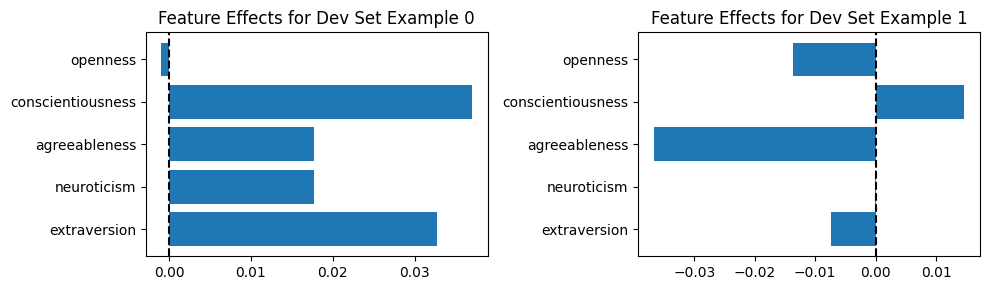

In [ ]:
# Compute the Feature Effects
import matplotlib.pyplot as plt

# Dev
dev_features_normalized = (dev_features - dev_features.mean()) / dev_features.std() # Normalize the dev set
dev_features_normalized_intercept = sm.add_constant(dev_features_normalized)
linear_regression_dev = sm.OLS(dev_labels, dev_features_normalized_intercept)
dev_pred = linear_regression_dev.fit()

# Show bar graphs
dev_instances = dev_features_normalized_intercept.head(2)
dev_pred_1_contributions = dev_instances.iloc[0] * coefficients # Effect for the first dev instance
dev_pred_2_contributions = dev_instances.iloc[1] * coefficients # Effect for the second dev instance

# Plotting the contributions
plt.figure(figsize=(10, 3))

# Feature names excluding the intercept
feature_names = dev_features.columns

# Plotting the contributions for the first dev instance
plt.subplot(1, 2, 1)
plt.barh(feature_names, dev_pred_1_contributions[1:])
plt.axvline(x=0, color='k', linestyle='--')
plt.title('Feature Effects for Dev Set Example 0')

# Plotting the contributions for the second dev instance
plt.subplot(1, 2, 2)
plt.barh(feature_names, dev_pred_2_contributions[1:])
plt.axvline(x=0, color='k', linestyle='--')
plt.title('Feature Effects for Dev Set Example 1')

plt.tight_layout()
plt.show()

**Q1.5**

Reflection: why would training a regression tree not work well for this dataset in terms of model interpretability? And under what conditions could the dataset be used with a decision tree to yield an interpretable model?

> Answer: Training a regression tree on this dataset would not allow us to quantify the degree of contribution of each feature to the prediction, but merely explain which features and at what thresholds were used to make splits to produce one particular decision. Therefore it is useful for local model interpretability but not to interpret the general model behavior. With Linear regression we can use the R2 value to indicate how well our features explain the variance of the prediction. In our case the instances can explain more than 91% of variation within the job interview invitation. Also, the t-statistic is larger than zero for all the coefficients indicating the standard error is smaller compared to them. Additionally, more evidence of coefficient significance is given by the p-value computed with the T-statistics that holds extremely small value (below 0.05) for both intercept and features.

### **2. Explainable Boosting Model**
Train an Explainable Boosting Machine (EBM) with [InterpretML](https://interpret.ml/docs/ebm.html). EBM is a Generalized Additive Model (GAM) that is highly intelligible and explainable.

The `interpret` package provides both global and local explanation functions: `explain_global()` and `explain_local()` can be used to interpret a ML model.

**Q2.1**

Visualize/provide global (model-wise) feature importances for EBM as a table or figure.

In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
from sklearn.metrics import mean_squared_error, r2_score

# EBM Global feature importances
ebm = ExplainableBoostingRegressor()
ebm.fit(train_features, train_labels)
test_pred = ebm.predict(test_features)

mse = mean_squared_error(test_labels, test_pred)
r2 = r2_score(test_labels, test_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R2: {r2:.3f}")
show(ebm.explain_global())

Mean Squared Error: 0.002
R2: 0.906


**Q2.2**

What are the most important two features in EBM? Are they the same as in the linear model?

> Answer: The most important features in EBM are conscientiousness and neuroticism. The former corresponds to the most important feature in Linear Regression the latter differs as in the second most important feature in Linear Regression is agreebleness

Now, to have an idea how EBM treats the input and generates the explanation, visualize EBM local explanations on a synthetic instance generated from training set mean feature vector as input and training set mean response as output.



In [ ]:
# EBM Local explanation for training set mean vector with corresponding training set mean label
train_mean_x = pd.DataFrame(train_features.mean(axis=0)).T
train_mean_y = pd.DataFrame([train_labels.mean()])

print(train_mean_x)
print(train_mean_y)

show(ebm.explain_local(train_mean_x, train_mean_y), 0)

   extraversion  neuroticism  agreeableness  conscientiousness  openness
0      0.476146     0.520286       0.548181           0.522731  0.566281
         0
0  0.50378


**Q2.3**

Now, visualize local (instance-wise) feature importances for the first two instances of the development set.

In [ ]:
# EBM local explanations for the first two development set instances
ebm_local = ebm.explain_local(dev_features[:2], dev_labels[:2])

# Local explanation for the first instance
print("Local explanation for the first instance:")
show(ebm_local, 0)

# Local explanation for the second instance
print("Local explanation for the second instance:")
show(ebm_local, 1)

Local explanation for the first instance:


Local explanation for the second instance:


**Q2.4**

Let's compare these feature importances with the feature effects in question 1.4.

* Are the feature contribution orderings the same in both models for the two instances?
> Answer: For the first dev set instance, the most important features in EBM are conscientiousness, extraversion, agreeableness, neuroticism and openness. Similarly, in Linear regression conscientiousnes and extraversion are the top 2 features and openness reamins the last feature by importance. The only difference is that agreeableness and neuroticism holds the same amount of importance now. For the second dev set instance, the feature importance ranking in EBM is made by agreeableness, openness, conscientiousness, extraversion and neuroticism. The Linear Regression's feature ordering changes to the extent of swapping openness with conscientiousness importance of contribution, as openess becomes the third most important feature.

* For the second example's explanation, why do you think the contribution of *conscientiousness* is positive, while the contribution of *agreeableness* is negative? (Hint: consider the feature values relative to the training set mean values you calculated / processed in the former subquestion.)
> Answer: When compared with the global explanation for the training set mean, the local explanation of the first two dev instances reflects the positive contribution of the conscientiousness and the negative contribution of agreeableness, therefore the local explanations are ocnsistent with the explained global model behavior.

# Part 2. Model-Agnostic Methods for Interpreting/Explaining NN

### **3. Training Neural Networks**
Train a one-layer Neural Network (multi-layer perceptron (MLP) Regressor, but with one layer) with the following settings:

- Activation function: ReLU
- Size of the hidden layer: 50 neurons
- Recommended optimizer/solver: Adam

For a tutorial see [Tutorial](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Q3.1**

Apply the trained neural network model to the development set to find the best hyperparameters (such as learning rate). Report the Root Mean Square Error (RMSE) performance measure.

**Note.** A development set RMSE below 0.045 is reasonable, then you can apply the corresponding model on the test set in the next question.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error
# Train the MLPRegressor and show RMSE on development set
param_grid = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

mlp = MLPRegressor(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(train_features, train_labels)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_
pred_dev = best_model.predict(dev_features)

rmse = np.sqrt(mean_squared_error(dev_labels, pred_dev))
print(f"Development RMSE: {rmse:.3f}")

Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'solver': 'adam'}
Development RMSE: 0.043


**Q3.2**

Now use the best settings to report the Root Mean Square Error (RMSE) performance measure on the test set.

It is possible to use the combination of the training and development sets to retrain the model and report the test set performance. You can also use the model that was trained on the training set only.

In [ ]:
# RMSE on test set
pred_test = best_model.predict(test_features)
rmse_test = np.sqrt(mean_squared_error(test_labels, pred_test))
print(f"Test RMSE: {rmse_test:.3f}")

Test RMSE: 0.045


Now we can analyze factors that influence the predictions. Both Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots can be used to visualize and analyze interaction between the target response and a set of input features of interest.

See the [Documentation](https://scikit-learn.org/stable/modules/partial_dependence.html) on how to use PDPs and ICEs.

**Q3.3**

Generate univariate and bivariate PDPs for the `conscientiousness` and `agreeableness` features with the neural network you trained above.

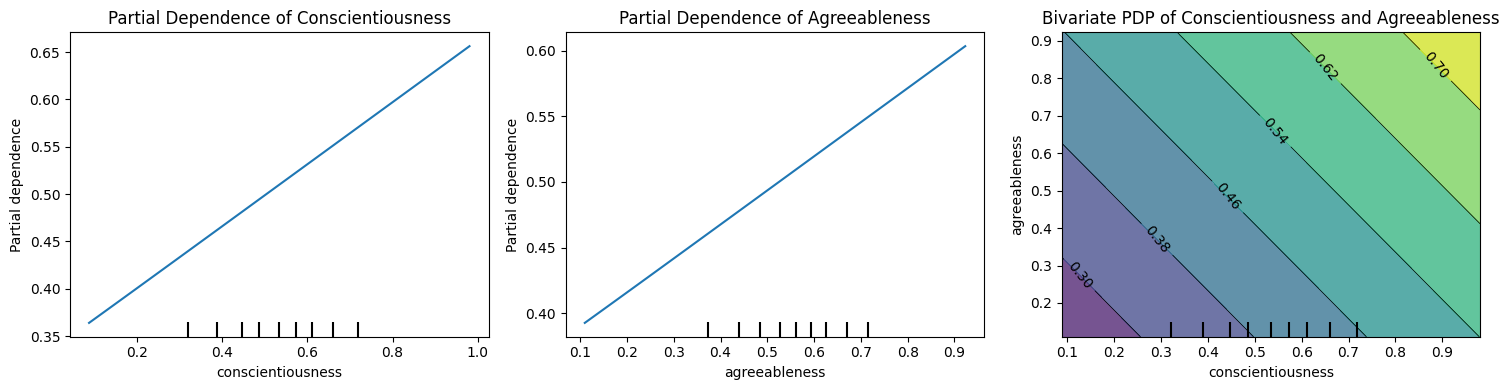

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# PDPs and bivariate PDP
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot partial dependence plot for Conscientiousness
PartialDependenceDisplay.from_estimator(best_model, test_features, features=[3], ax=axs[0])
axs[0].set_title('Partial Dependence of Conscientiousness')

# Plot partial dependence plot for Agreeableness
PartialDependenceDisplay.from_estimator(best_model, test_features, features=[2], ax=axs[1])
axs[1].set_title('Partial Dependence of Agreeableness')

# Plot bivariate PDP for Conscientiousness and Agreeableness
PartialDependenceDisplay.from_estimator(best_model, test_features, features=[(3, 2)],  ax=axs[2])
axs[2].set_title('Bivariate PDP of Conscientiousness and Agreeableness')

plt.tight_layout()
plt.show()

**Q3.4**

What do these plots show?

> Answer: The first two graphs show the partial dependence of job interview invitations on consciousness and agreeableness, respectively.

The x-axis of each graph represents the value of the feature being examined (conscientiousness or agreeableness). The y-axis of each graph represents the partial dependence, which is the average change in the prediction (job interview invitation probability) for a given value of the feature, after averaging out the effects of all other features.

In general, if the partial dependence plot for a feature is relatively flat, it suggests that the feature has little effect on the model’s prediction. Conversely, if the plot is sloped, it suggests that the feature has a strong effect on the prediction.

Based on the pdp plots both features namely "Conscientiousness” and "Agreeableness" appear to show an increasing slope, suggesting that people with higher conscientiousness/agreeableness scores are predicted to have a higher probability of receiving a job interview invitation. The realtion is entirely linear with a positive slope.
As for the third plot by analyzing the color distribution across the plot, we can understand how the combined effects of conscientiousness and agreeableness influence the predicted interview invitation probability:

High Conscientiousness & Agreeableness (Top Right):
This area likely shows a warm color, suggesting a high probability of receiving an interview invitation.
The model might interpret individuals with high scores on both conscientiousness (reliable, organized) and agreeableness (pleasant, cooperative) as ideal candidates.

High Conscientiousness & Low Agreeableness (Top Left):
This area might show a warm color, though potentially less intense compared to the top right corner.
The model might still predict a high interview invitation probability for highly conscientious individuals, even with lower agreeableness scores.

Low Conscientiousness & High Agreeableness (Bottom Right):
This area might have a cooler color, suggesting a lower probability of receiving an interview invitation.
The model might predict a lower chance for individuals with low conscientiousness (less organized, reliable) even with high agreeableness scores.

Low Conscientiousness & Low Agreeableness (Bottom Left):
This area likely shows the coolest color, indicating the lowest probability of receiving an interview invitation.
The model might predict the lowest chance for candidates scoring low on both conscientiousness and agreeableness.

**Q3.5**

Now generate ICE plots for each feature.

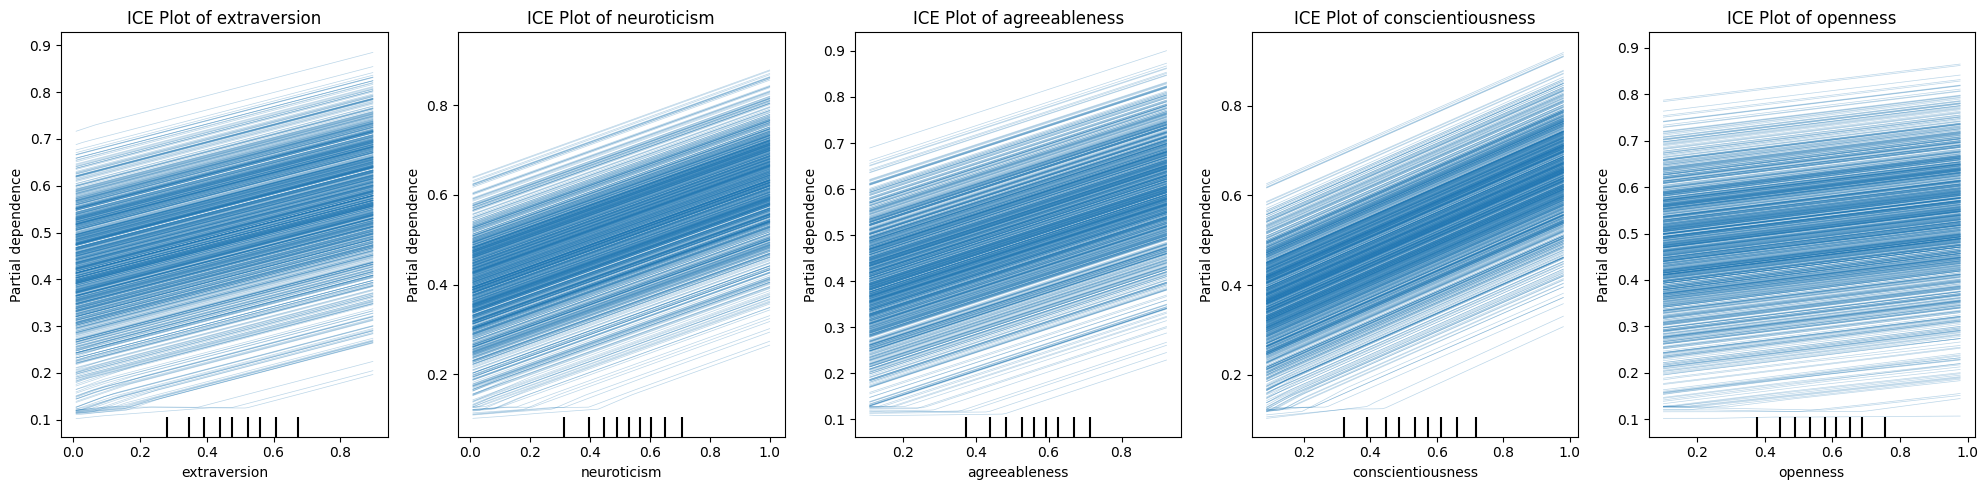

In [ ]:
# ICEs
features_of_interest=[x for x in train_features.columns]
fig, axes = plt.subplots(1, len(features_of_interest), figsize=(20, 5))
for i, feature in enumerate(features_of_interest):
    PartialDependenceDisplay.from_estimator(
        best_model, test_features, features=[i], kind='individual', ax=axes[i]
    )
    axes[i].set_title(f'ICE Plot of {feature}')
plt.tight_layout()
plt.show()

**Q3.6**

What can you conclude from ICE plots above?

> Answer: Based on the ICE plots obtained above, here's an analysis for all five personality features:-
1: Extraversion:- The plot shows individuals with higher extraversion score have a high chance of getting a job. The chance for getting a job increases as the score incereases, showing a linear realtionship.
2: Neuroticism: The plot shows a relativley less steeper slope but a constant linear increment in the chances of getting a job interview. The model establishes a linear relation between the outcome and the feature values.
3: Agreeableness: The plot shows that Agreeableness has a more steep slope than the Neuroticism but lesser than Extraversion, suggesting that the changes in values of agreeableness have a linear change in the output generated by the model.
4: Conscientiousness:- It shows similar trend like Neuroticism. This feautre correlates positively with the predictions of the model.
5: Opennes:- Since the plot doesnt has that much of a slope, each change in value of the feature effects the output minorly only.

**Q3.7**

Implement the PDF (Partial Dependence Function) for univariate analysis of the trained NN model.


In [ ]:
def PDF(X, model, feature):
  """
  Input   Dataset 'X', Model 'model', feature_name 'feature'
  Output  x_values: independent variable values
          f_values: corresponding output per x value
  """
  # Note: uncomment the lines below and complete the right hand side (where you see '..' to set them to suitable values, respective explanations are provided for each variable
  num_samples = 100
  min_val = X[feature].min()
  max_val = X[feature].max()
  step_size = (max_val - min_val) / (num_samples - 1)
  x_values = np.linspace(min_val, max_val, num_samples)
  f_values = np.zeros(num_samples)

  for k in range(num_samples-1):
        # Create a copy of the dataset
        X_temp = X.copy()

        # Set the feature value for all samples to the current x_value
        X_temp[feature] = x_values[k]

        # Predict using the model and calculate the mean prediction
        predictions = model.predict(X_temp)
        f_values[k] = np.mean(predictions)

  return x_values, f_values

**Q3.8**

Calculate and visualize the feature importances obtained by your PDF algorithm with a bar graph. How do we calculate the feature importance given the x_values and y_values of the PDF algorithm?

In [ ]:
# First calculate the x_values and f_values for each feature
pdf_values={}

for feature in test_features.columns:
    x_values, f_values = PDF(test_features, best_model, feature)
    pdf_values[feature] = (x_values, f_values)

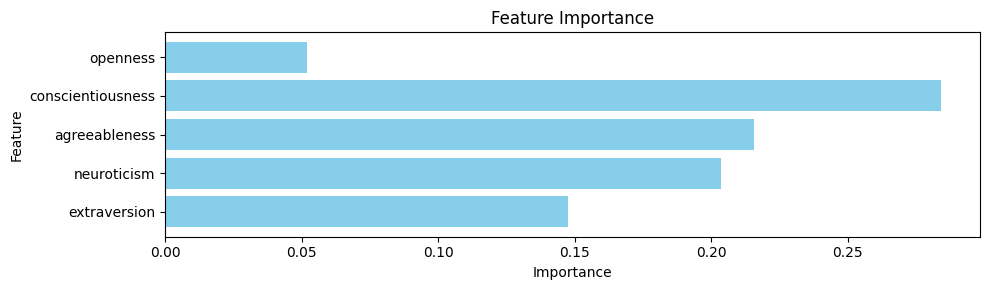

In [ ]:
from scipy.stats import linregress

# Fit a linear model per feature, what is the output of this linear model?
results = {}

for feature, (x_values, f_values) in pdf_values.items():
    slope, intercept, r_value, p_value, std_err = linregress(x_values, f_values)
    test_pred = intercept + slope * test_features[feature]
    results[feature] = {'rmse': np.sqrt(mse), 'r2': r2, 'importance': abs(slope), 'intercept': intercept, 'p_value': p_value, 'std_err': std_err}

# Extract feature names and their importance for plotting
features = list(results.keys())
importances = [info['importance'] for info in results.values()]

# Plot
plt.figure(figsize=(10, 3))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

**Q3.9**

What are the two most important features obtained by the PDF algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer: The PDF algorithm returns conscientiousness and agreebleness which corresponds to the same two most important features provided by the Linear model because the PDF values are such that the Partial denisty function is straight line that can be approximated by the linear model. The EBM idenitfy conscientoiusness and neuroticism as the top two features, followed by agreebleness by a small margin. The increased capability of capturing more complex patterns allows this model to deviate from a linear and simpler explanation.


### **4. Permutation Feature Importance**

**Q4.1**

Implement the permutation feature importance algorithm using RMSE as the error function. No existing libraries (barring the RMSE from `sklearn` and a function for random sampling / permutation) are allowed to be used, you will implement it yourself with the framework below.

In [ ]:
def PFI(X, labels, model, base_rmse):
  results = []

  for feature in X:
    # Create a copy of X_test
    X_test = X.copy()

    # Scramble the values of the given predictor many time to produce an average score
    shuffle_results = []
    for i in range(100):
      X_test[feature] = np.random.permutation(X_test[feature])
      pred_test = model.predict(X_test)
      test_rmse = np.sqrt(mean_squared_error(labels, pred_test))
      importance = test_rmse - base_rmse
      shuffle_results.append(importance)

    results.append(np.mean(shuffle_results)) # collect average results

  # Put the results into a pandas dataframe and rank the predictors by score
  feature_scores = pd.DataFrame(results, columns=['importance'])
  results_df = feature_scores.sort_values(by='importance')

  return results_df

**Q4.2**

Visualize the feature importances obtained by your PFI algorithm with a bar graph.

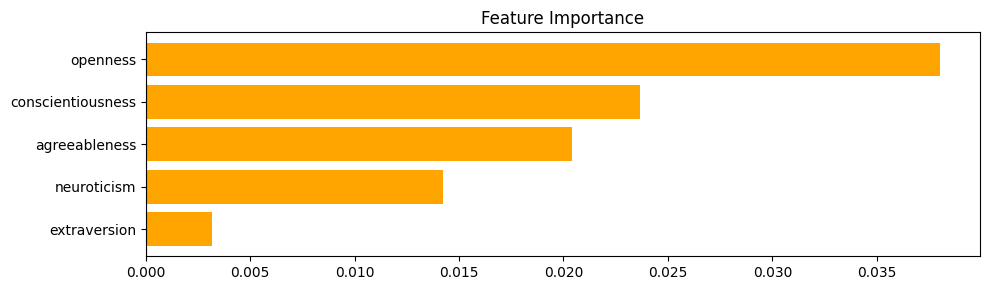

In [ ]:
# Bar graph of feature importances
plt.figure(figsize=(10, 3))

pfi = PFI(test_features, test_labels, best_model, rmse_test)
feature_names = dev_features.columns

plt.barh(feature_names, pfi['importance'].values, color='orange')
plt.axvline(x=0, color='k', linestyle='--')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

**Q4.3**

What are the two most important features obtained by the permutation feature importance algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer:When compared to the linear model's conscientiousness and agreebleness we obsverve that the more complex MLP relies first on a total different feature of openness and then share as second most important feature conscientiousness. Conversely, EBM shares the conscientiousness feature with the MLP that seems to depend on openness over neuroticism to make its predictions.

**Q4.4**

Explain two disadvantages of the PFI method.

> Answer: The feature importance is contingent on the difference between the original model error and the model tested on the shuffled features. Therefore we're measuring the importance of the features based on the goodness of their performances and nonetheless necessitating the ground truthas the importance measure cannot be drawn from unlabeled data. Another drawback is the potenital bias arising from the correlation of the features which may lead to create unrealistic data instances.